In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
import os
import keras
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras import backend as K
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

#ignore warning messages 
import warnings
warnings.filterwarnings('ignore') 

sns.set()

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [2]:
DATA_DIR = "C:/Users/Yashwanth/Downloads/Datasets/Handwritten_digit_dataset/train.csv"
IMG_SIZE = 28
dataset = pd.read_csv("C:/Users/Yashwanth/Downloads/Datasets/Handwritten_digit_dataset/train.csv").astype('float32')
dataset.rename(columns={'0':'label'}, inplace=True)
X = dataset.drop('label',axis = 1)
y = dataset['label']

In [3]:
print("shape:",X.shape)
print("culoms count:",len(X.iloc[1]))
print("784 = 28X28")

shape: (42000, 784)
culoms count: 784
784 = 28X28


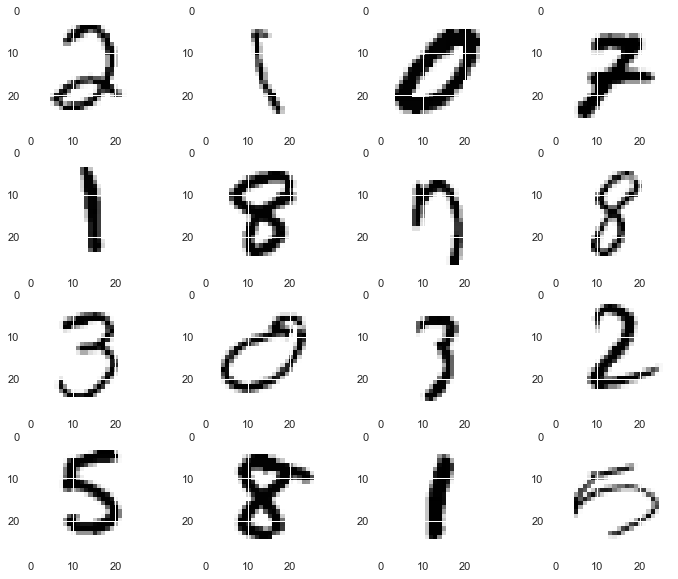

In [4]:
from sklearn.utils import shuffle

X_shuffle = shuffle(X)

plt.figure(figsize = (12,10))
row, colums = 4, 4
for i in range(16):  
    plt.subplot(colums, row, i+1)
    plt.imshow(X_shuffle.iloc[i].values.reshape(28,28),interpolation='nearest', cmap='Greys')
plt.show()

Amount of each labels


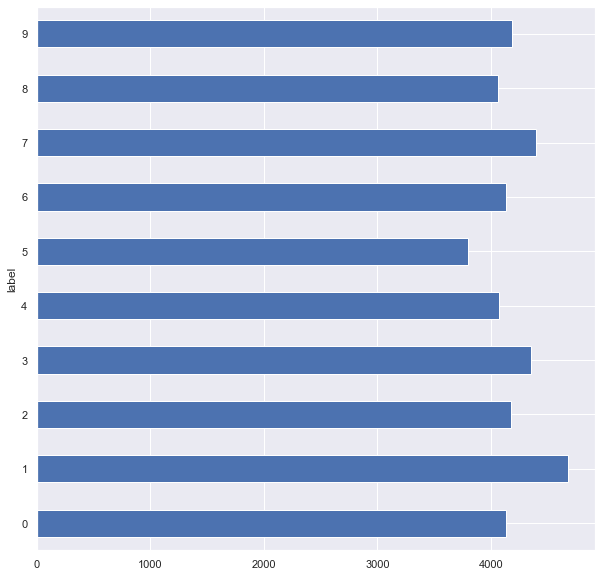

In [5]:
print("Amount of each labels")

# Change label to alphabets
alphabets_mapper = {0:0,1:1,2:2,3:3,4:4,5:5,6:6,7:7,8:8,9:9} 
dataset_alphabets = dataset.copy()
dataset['label'] = dataset['label'].map(alphabets_mapper)

label_size = dataset.groupby('label').size()
label_size.plot.barh(figsize=(10,10))
plt.show()

In [6]:
# splite the data
X_train, X_test, y_train, y_test = train_test_split(X,y)

# scale data
standard_scaler = MinMaxScaler()
standard_scaler.fit(X_train)

X_train = standard_scaler.transform(X_train)
X_test = standard_scaler.transform(X_test)

Data after scaler


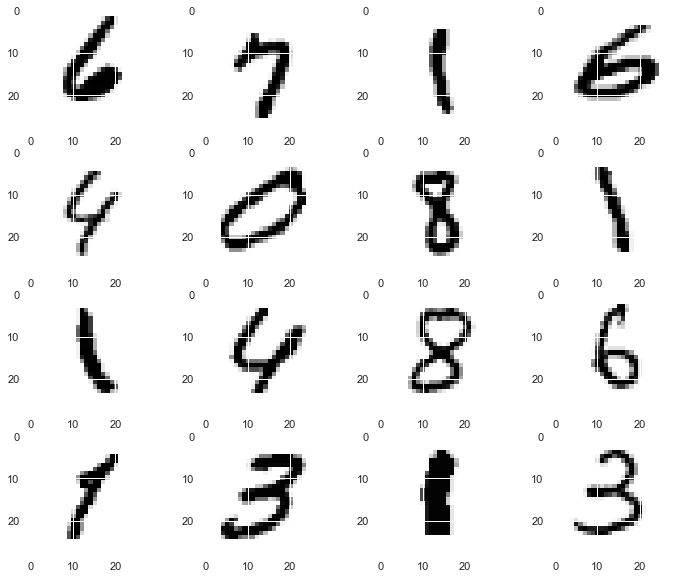

In [7]:
print("Data after scaler")
X_shuffle = shuffle(X_train)

plt.figure(figsize = (12,10))
row, colums = 4, 4
for i in range(16):  
    plt.subplot(colums, row, i+1)
    plt.imshow(X_shuffle[i].reshape(28,28),interpolation='nearest', cmap='Greys')
plt.show()

In [8]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [9]:
cls = Sequential()
cls.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
cls.add(MaxPooling2D(pool_size=(2, 2)))
cls.add(Dropout(0.3))
cls.add(Flatten())
cls.add(Dense(128, activation='relu'))
cls.add(Dense(len(y.unique()), activation='softmax'))

cls.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = cls.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=9, batch_size=200, verbose=2)

scores = cls.evaluate(X_test,y_test, verbose=0)
print("CNN Score:",scores[1])

Epoch 1/9
158/158 - 23s - loss: 0.3765 - accuracy: 0.8912 - val_loss: 0.1561 - val_accuracy: 0.9541
Epoch 2/9
158/158 - 9s - loss: 0.1135 - accuracy: 0.9673 - val_loss: 0.0935 - val_accuracy: 0.9730
Epoch 3/9
158/158 - 9s - loss: 0.0746 - accuracy: 0.9783 - val_loss: 0.0739 - val_accuracy: 0.9789
Epoch 4/9
158/158 - 9s - loss: 0.0582 - accuracy: 0.9827 - val_loss: 0.0706 - val_accuracy: 0.9802
Epoch 5/9
158/158 - 9s - loss: 0.0476 - accuracy: 0.9853 - val_loss: 0.0716 - val_accuracy: 0.9800
Epoch 6/9
158/158 - 9s - loss: 0.0382 - accuracy: 0.9888 - val_loss: 0.0613 - val_accuracy: 0.9838
Epoch 7/9
158/158 - 9s - loss: 0.0326 - accuracy: 0.9895 - val_loss: 0.0682 - val_accuracy: 0.9825
Epoch 8/9
158/158 - 11s - loss: 0.0291 - accuracy: 0.9909 - val_loss: 0.0610 - val_accuracy: 0.9866
Epoch 9/9
158/158 - 10s - loss: 0.0256 - accuracy: 0.9917 - val_loss: 0.0569 - val_accuracy: 0.9849
CNN Score: 0.9848571419715881


In [10]:
# Save weights
cls.save_weights('quickdraw_neuralnet.h5')
cls.save('quickdraw.model')
print("Model is saved")

INFO:tensorflow:Assets written to: quickdraw.model\assets
Model is saved
